# Exploring Dandiset 001359: Human Patch-seq Data from Allen Institute

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Consult the original data and documentation for critical applications.

## Overview of the Dandiset

This notebook explores Dandiset [001359 (version 0.250401.1603)](https://dandiarchive.org/dandiset/001359/0.250401.1603).

**Dandiset Name:** 20250331_AIBS_Patchseq_human

**Description:** HMBA Lein PatchSeq upload (human) (Q1 2025)

This Dandiset contains Patch-seq data, which combines patch-clamp electrophysiology, morphological reconstruction, and transcriptomics from single cells. The data is from human brain tissue, provided by the Allen Institute for Brain Science.

**Contributors:** Gonzalez, Limary; Allen Institute for Brain Science; National Institute of Mental Health; Kalmbach, Brian; Dalley, Rachel; Lein, Ed; Lee, Brian

**Keywords:** Patch-seq, human, multimodal

## What this notebook covers

This notebook will guide you through:
1. Listing required Python packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing assets (NWB files) within the Dandiset.
4. Selecting and loading a specific NWB file from the Dandiset.
5. Exploring the basic structure and metadata of the NWB file.
6. Visualizing some of the electrophysiological data (e.g., a current clamp recording) from the NWB file.
7. Summarizing the findings and suggesting potential future directions for analysis.

## Required Packages

To run this notebook, you will need the following Python packages. It is assumed these are already installed in your environment.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for reading NWB files)
* `h5py` (dependency for pynwb, for HDF5 file operations)
* `remfile` (for streaming remote files)
* `numpy` (for numerical operations)
* `matplotlib` (for plotting)
* `seaborn` (for enhanced plotting aesthetics)
* `itertools` (used for slicing iterators)

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile

# Set seaborn theme for plots (optional, for aesthetics)
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001359"
dandiset_version = "0.250401.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets (path and ID):")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Dandiset description: HMBA Lein PatchSeq upload (human) (Q1 2025)

First 5 assets (path and ID):
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB file from the Dandiset

We will now load one of the NWB files from the Dandiset to explore its contents.

For this example, we will use the NWB file with the following path and asset ID:
- **Path:** `sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb`
- **Asset ID:** `c269347a-2d4b-4b6a-8b7c-2ef303ff503d`

The direct download URL for this asset is:
`https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/`

We will use `remfile` and `pynwb` to stream and load this remote NWB file.

In [2]:
# Hardcoded URL for the selected NWB file
nwb_asset_id = "c269347a-2d4b-4b6a-8b7c-2ef303ff503d"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
selected_asset_path = "sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb"

print(f"Loading NWB file: {selected_asset_path}")
print(f"From URL: {nwb_file_url}")

# Load the NWB file
# This uses the exact code structure provided by the `nwb-file-info` tool
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode
nwb = io.read()

print("\nSuccessfully loaded NWB file.")
print(f"NWBFile Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")

Loading NWB file: sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
From URL: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Successfully loaded NWB file.
NWBFile Identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session Description: PLACEHOLDER
Session Start Time: 2022-09-06 17:44:39.146000+00:00


### Explore this NWB file on Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

[Neurosift Link for sub-1203384279_ses-1207262032_icephys.nwb](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

(Note: the version in the Neurosift link might point to 'draft' if the specific version is not directly supported yet, but the asset ID ensures the correct file is loaded).

### Summary of the NWB File Contents

Let's examine the structure of this NWB file. NWB files organize data into groups. Key groups include:

*   `session_description`: General description of the recording session.
*   `identifier`: Unique identifier for the NWB file.
*   `session_start_time`: Timestamp for the start of the session.
*   `subject`: Information about the subject (e.g., species, age, sex).
*   `devices`: Information about the devices used.
*   `icephys_electrodes`: Details about the intracellular electrodes used.
*   `acquisition`: Raw acquired data, typically TimeSeries objects (e.g., VoltageClampSeries, CurrentClampSeries).
*   `stimulus`: Stimulus data, also typically TimeSeries objects.
*   `processing`: Processed data. For Patch-seq, this might include spike times if feature extraction was performed.
*   `intervals`/`epochs`: Time intervals of interest, such as different experimental conditions or sweeps.
*   `sweep_table`: A table that groups PatchClampSeries (sweeps) together, often used in intracellular electrophysiology.

Let's print some high-level metadata from the loaded NWB file:

In [3]:
print("--- NWB File Metadata ---")
print(f"Subject ID: {nwb.subject.subject_id if nwb.subject else 'N/A'}")
if nwb.subject:
    print(f"Subject Species: {nwb.subject.species}")
    print(f"Subject Age: {nwb.subject.age}")
    print(f"Subject Sex: {nwb.subject.sex}")

print(f"\nInstitution: {nwb.institution}")
print(f"Laboratory: {nwb.lab}")
print(f"Experimenter(s): {nwb.experimenter}")
print(f"Experiment Description: {nwb.experiment_description}")

print("\n--- Acquisition Data ---")
if nwb.acquisition:
    print(f"Found {len(nwb.acquisition)} acquisition series.")
    for i, series_name in enumerate(nwb.acquisition.keys()):
        series = nwb.acquisition[series_name]
        print(f"  {i+1}. {series_name} (Type: {type(series).__name__}, Shape: {series.data.shape if hasattr(series, 'data') else 'N/A'})")
        if i == 4: # Print details for a few series to keep it concise
            print("     ...")
            break
else:
    print("No acquisition data found.")

print("\n--- Stimulus Data ---")
if nwb.stimulus:
    print(f"Found {len(nwb.stimulus)} stimulus series.")
    for i, series_name in enumerate(nwb.stimulus.keys()):
        series = nwb.stimulus[series_name]
        print(f"  {i+1}. {series_name} (Type: {type(series).__name__}, Shape: {series.data.shape if hasattr(series, 'data') else 'N/A'})")
        if i == 4: # Print details for a few series
            print("     ...")
            break
else:
    print("No stimulus data found.")

print("\n--- Sweep Table ---")
if nwb.sweep_table:
    print(f"Sweep table found with columns: {nwb.sweep_table.colnames}")
    df_sweep_table = nwb.sweep_table.to_dataframe()
    print("First 5 rows of the sweep table:")
    print(df_sweep_table.head())
else:
    print("No sweep table found.")

--- NWB File Metadata ---
Subject ID: 1203384279
Subject Species: Homo sapiens
Subject Age: P21170.0D
Subject Sex: M

Institution: Allen Institute for Brain Science
Laboratory: None
Experimenter(s): None
Experiment Description: None

--- Acquisition Data ---
Found 70 acquisition series.
  1. data_00000_AD0 (Type: VoltageClampSeries, Shape: (161000,))
  2. data_00001_AD0 (Type: VoltageClampSeries, Shape: (161000,))
  3. data_00002_AD0 (Type: VoltageClampSeries, Shape: (12297000,))
  4. data_00003_AD0 (Type: VoltageClampSeries, Shape: (161000,))
  5. data_00004_AD0 (Type: CurrentClampSeries, Shape: (307375,))
     ...

--- Stimulus Data ---
Found 70 stimulus series.
  1. data_00000_DA0 (Type: VoltageClampStimulusSeries, Shape: (161000,))
  2. data_00001_DA0 (Type: VoltageClampStimulusSeries, Shape: (161000,))
  3. data_00002_DA0 (Type: VoltageClampStimulusSeries, Shape: (12297000,))
  4. data_00003_DA0 (Type: VoltageClampStimulusSeries, Shape: (161000,))
  5. data_00004_DA0 (Type: Curren

## Visualizing Data from the NWB File

Let's load and visualize a segment of a `CurrentClampSeries` from the acquisition data. We will select `data_00004_AD0` which appears to be a current clamp recording based on the `nwb-file-info` output (unit: volts).

Selected series: data_00004_AD0
Description: PLACEHOLDER
Unit: volts
Data shape: (307375,)
Sampling rate: 50000.0 Hz
Plotting the first 50000 data points.


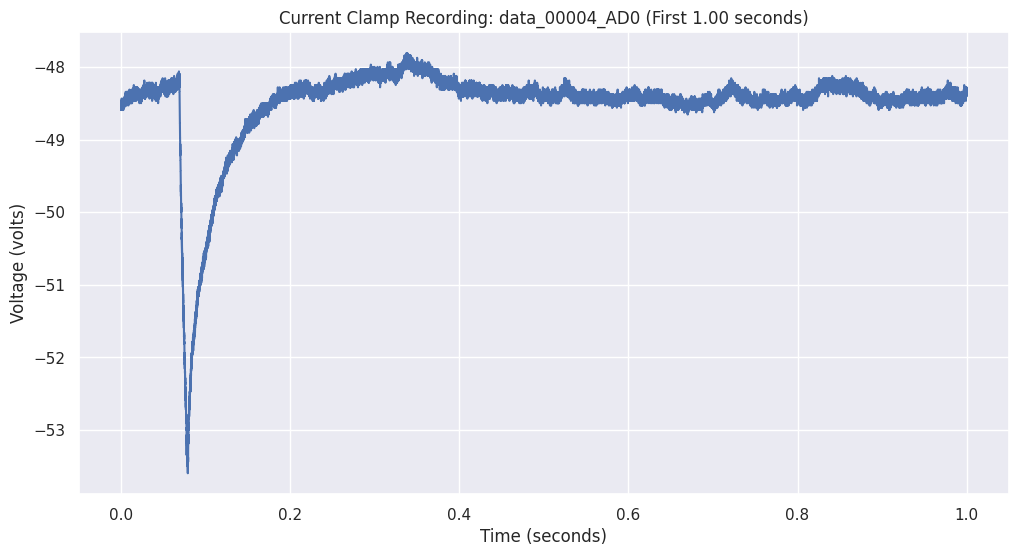

In [4]:
# Select a CurrentClampSeries to plot
# Based on the nwb-file-info output, 'data_00004_AD0' is a CurrentClampSeries.
series_to_plot_name = 'data_00004_AD0'

if series_to_plot_name in nwb.acquisition:
    current_clamp_series = nwb.acquisition[series_to_plot_name]
    print(f"Selected series: {series_to_plot_name}")
    print(f"Description: {current_clamp_series.description}")
    print(f"Unit: {current_clamp_series.unit}")
    print(f"Data shape: {current_clamp_series.data.shape}")
    print(f"Sampling rate: {current_clamp_series.rate} Hz")

    # Load a subset of the data to avoid excessive memory usage and download time
    # Let's plot the first 50000 data points (e.g., 1 second if rate is 50kHz)
    num_points_to_plot = 50000
    if current_clamp_series.data.shape[0] > num_points_to_plot: # CORRECTED >
        data_subset = current_clamp_series.data[:num_points_to_plot]
        time_subset = np.arange(num_points_to_plot) / current_clamp_series.rate
        print(f"Plotting the first {num_points_to_plot} data points.")
    else:
        data_subset = current_clamp_series.data[:]
        time_subset = np.arange(len(data_subset)) / current_clamp_series.rate
        print(f"Plotting all {len(data_subset)} data points.")


    plt.figure(figsize=(12, 6))
    plt.plot(time_subset, data_subset)
    plt.title(f"Current Clamp Recording: {series_to_plot_name} (First {len(data_subset)/current_clamp_series.rate:.2f} seconds)")
    plt.xlabel(f"Time ({current_clamp_series.starting_time_unit})")
    plt.ylabel(f"Voltage ({current_clamp_series.unit})")
    plt.grid(True)
    plt.show()

else:
    print(f"Series '{series_to_plot_name}' not found in nwb.acquisition.")

The plot above shows a segment of a current clamp recording. We can see voltage fluctuations over time, which might include action potentials or other subthreshold events depending on the stimulus and cell state.

## Exploring Stimulus Data
Let's also visualize the corresponding stimulus for the `data_00004_AD0` acquisition series. The stimulus series often has a similar name, e.g., `data_00004_DA0`.

Selected stimulus series: data_00004_DA0
Description: PLACEHOLDER
Unit: amperes
Data shape: (307375,)
Sampling rate: 50000.0 Hz
Plotting the first 50000 data points of the stimulus.


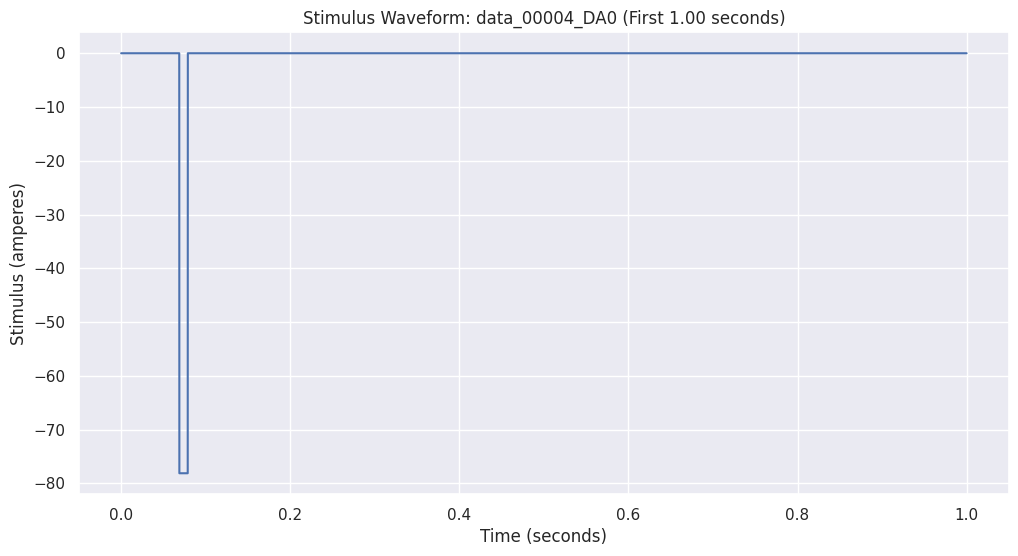

In [5]:
stimulus_series_name = 'data_00004_DA0' # Corresponding stimulus series

if stimulus_series_name in nwb.stimulus:
    stimulus_series = nwb.stimulus[stimulus_series_name]
    print(f"Selected stimulus series: {stimulus_series_name}")
    print(f"Description: {stimulus_series.description}")
    print(f"Unit: {stimulus_series.unit}")
    print(f"Data shape: {stimulus_series.data.shape}")
    print(f"Sampling rate: {stimulus_series.rate} Hz")

    # Assuming the stimulus data has the same length and rate as the acquisition data for this segment
    if stimulus_series.data.shape[0] > num_points_to_plot: # CORRECTED > # Use the same num_points_to_plot
        stim_data_subset = stimulus_series.data[:num_points_to_plot]
        # time_subset is already defined from the acquisition plot
        print(f"Plotting the first {num_points_to_plot} data points of the stimulus.")
    else:
        stim_data_subset = stimulus_series.data[:]
        print(f"Plotting all {len(stim_data_subset)} data points of the stimulus.")

    plt.figure(figsize=(12, 6))
    plt.plot(time_subset, stim_data_subset)
    plt.title(f"Stimulus Waveform: {stimulus_series_name} (First {len(stim_data_subset)/stimulus_series.rate:.2f} seconds)")
    plt.xlabel(f"Time ({stimulus_series.starting_time_unit})")
    plt.ylabel(f"Stimulus ({stimulus_series.unit})")
    plt.grid(True)
    plt.show()
else:
    print(f"Stimulus series '{stimulus_series_name}' not found in nwb.stimulus.")

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI Archive and retrieve information about a Dandiset.
*   List and select an NWB file (asset) from the Dandiset.
*   Load a remote NWB file using `remfile` and `pynwb`.
*   Inspect basic metadata and the structure of the NWB file, including acquisition series, stimulus series, and sweep tables.
*   Visualize a segment of a current clamp recording and its corresponding stimulus.

**Possible Future Directions for Analysis:**

1.  **Detailed Sweep Analysis:** Iterate through the `sweep_table` to analyze responses to different stimuli for each sweep. This could involve plotting multiple sweeps together or extracting features like spike times, input resistance, or sag voltage.
2.  **Feature Extraction:** For `CurrentClampSeries` data showing action potentials, one could implement or apply existing tools for spike detection, and then analyze firing rates, spike shapes, or adaptation.
3.  **Voltage Clamp Analysis:** Explore `VoltageClampSeries` data (e.g., `data_00000_AD0` from the output) to investigate ionic currents, synaptic events, or membrane properties under voltage clamp conditions.
4.  **Correlation with Multimodal Data:** Since this is Patch-seq data, a key analysis would be to correlate electrophysiological features with morphological reconstructions or transcriptomic profiles for the same cells (though these data modalities might be in separate files or require linking via cell identifiers).
5.  **Population Analysis:** If multiple cells are analyzed, compare features across different cell types or experimental conditions.
6.  **Programmatic Exploration:** Develop scripts to automatically parse all `TimeSeries` objects in the `nwb.acquisition` and `nwb.stimulus` groups to get a comprehensive overview of all recorded data types and their parameters.

Remember that this Dandiset contains rich multimodal data, and this notebook only scratches the surface of what can be explored.

End of Notebook.